<h3>Introdução ao estudo do algoritmo K-means</h3>

<h4>Método Elbow</h4>

<div style='text-align:justify'>
    O método Elbow é uma técnica que permite avaliar o número do parâmetro K <b>(Quantidade de agrupamentos)</b>. Essa técnica avalia a soma dos quadrados dentro do agrupamento e compara a variância entre o número de agrupamentos. Desta forma, essa técnica permite verificar qual o valor ótimo para o parâmetro K.
    O valor de K é considerado ótimo quando o aumento do valor de K não tem alteração significativa na variância numa relação proporcional.
</div>

<h4>Importando pacotes</h4>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (10, 8)

<h4>Exemplo dataset Iris</h4>

In [3]:
iris = pd.read_csv('locallake/raw/iris.csv')

In [4]:
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [8]:
x = iris.iloc[:,[0,1,2,3]].values

In [10]:
wcss = [] #within cluster sum of squares

for i in range(1, 11):
    
    kmeans = KMeans(n_clusters = i, 
                    init = 'k-means++', 
                    max_iter = 300, 
                    n_init = 10, 
                    random_state = 0)
    kmeans.fit(x)
    
    wcss.append(kmeans.inertia_)
    
wcss

[681.3705999999996,
 152.34795176035797,
 78.851441426146,
 57.22847321428572,
 46.47223015873018,
 39.03998724608725,
 34.299712121212146,
 30.063110617452732,
 28.27172172856384,
 26.094324740540422]

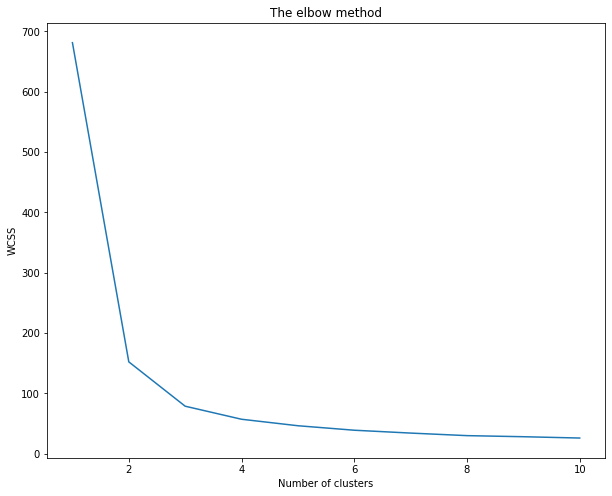

In [11]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [12]:
kmeans = KMeans(n_clusters = 3, 
                init = 'k-means++', 
                max_iter = 300, 
                n_init = 10, 
                random_state = 0)

y_kmeans = kmeans.fit_predict(x)

y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

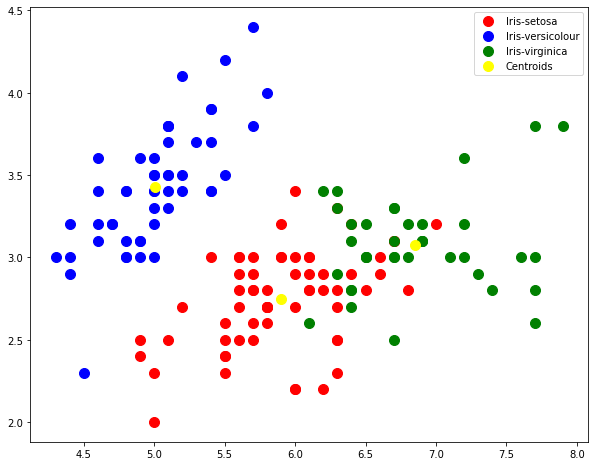

In [13]:
plt.scatter(x[y_kmeans == 0, 0], 
            x[y_kmeans == 0, 1], 
            s = 100, 
            c = 'red', 
            label = 'Iris-setosa')


plt.scatter(x[y_kmeans == 1, 0], 
            x[y_kmeans == 1, 1], 
            s = 100, 
            c = 'blue', 
            label = 'Iris-versicolour')

plt.scatter(x[y_kmeans == 2, 0], 
            x[y_kmeans == 2, 1], 
            s = 100, 
            c = 'green', 
            label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:,1], 
            s = 100, 
            c = 'yellow', 
            label = 'Centroids')

plt.legend()

plt.show()